In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

# Read The Dataset

In [5]:
#Reading the dataset using "read_csv" a prebuild function in the "pandas" package, the "index_col" contains the column to use as the row labels of the DataFrame
Stock = pd.read_csv('AppleDataset.csv',  index_col=0)
df_Stock = Stock
#"rename" prebuild function that enables us to change the name of a column in a Dataframe
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
#Display using Head function that returns the dataframe or series with the first few rows (by default 5)
df_Stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,152.580002,162.850006,152.000000,162.740005,161.760117,141147500
2022-02-25,163.839996,165.119995,160.869995,164.850006,163.857407,91974200
2022-02-28,163.059998,165.419998,162.429993,165.119995,164.125763,95056600
2022-03-01,164.699997,166.600006,161.970001,163.199997,162.217346,83474400
2022-03-02,164.389999,167.360001,162.949997,166.559998,165.557098,79724800


In [6]:
def create_train_test_set(df_Stock):
    #Taking all features as predictors of course droping the close  column...
    """
    the close  column represents the predicted value of close prices in the 
    previous 10 years. so not to make our model overfit and the learning to be biased by these values 
    we drop this column.

    """
    features = df_Stock.drop(columns=['Close'], axis=1)

    #now the target is to predit the values of the close column which represents the predicted 
    #prices by which shares of apple corporation will be sold (or bought).
    target = df_Stock['Close']
    

    data_len = df_Stock.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.7)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.2)
    print('Validation Set length - ', str(int(data_len * 0.2)))

    print('Test Set length - ', str(int(data_len * 0.1)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [7]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  251
Training Set length -  175
Validation Set length -  50
Test Set length -  25
(175, 5) (50, 5) (26, 5)
(175,) (50,) (26,)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve

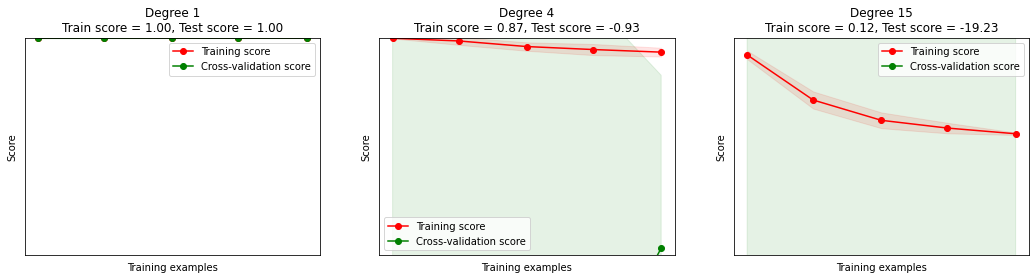

In [9]:
# Define the pipeline to fit polynomial regression models of different degrees
degrees = [1, 4, 15]
plt.figure(figsize=(18, 4))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X_train, Y_train)

    # Compute the learning curve for the model
    train_sizes, train_scores, test_scores = learning_curve(pipeline, X_train, Y_train, train_sizes=np.linspace(0.1, 1.0, 5), cv=5)

    # Compute the mean and standard deviation of the training and test scores across folds
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.title("Degree {}\nTrain score = {:.2f}, Test score = {:.2f}".format(degrees[i], train_scores_mean[-1], test_scores_mean[-1]))
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.ylim(-1, 1)
    plt.legend(loc="best")

plt.show()

Historical Stock Data length is -  251
Training Set length -  175
Validation Set length -  50
Test Set length -  25
(175, 5) (50, 5) (26, 5)
(175,) (50,) (26,)


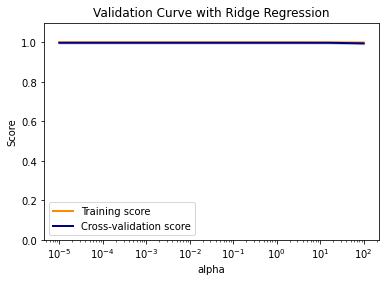

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

# Load the data using the create_train_test_set function
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

# Define the values of alpha (complexity parameter) to test
alphas = np.logspace(-5, 2, 10)

# Define the pipeline to fit Ridge regression models with different values of alpha
pipeline = Pipeline([("ridge", Ridge())])
train_scores, test_scores = validation_curve(pipeline, X_train, Y_train, param_name="ridge__alpha", param_range=alphas, cv=10)

# Compute the mean and standard deviation of the training and test scores across folds
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.title("Validation Curve with Ridge Regression")
plt.xlabel("alpha")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(alphas, train_scores_mean, label="Training score", color="darkorange", lw=lw)
plt.fill_between(alphas, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="darkorange", lw=lw)
plt.semilogx(alphas, test_scores_mean, label="Cross-validation score", color="navy", lw=lw)
plt.fill_between(alphas, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="navy", lw=lw)
plt.legend(loc="best")
plt.show()


Historical Stock Data length is -  251
Training Set length -  175
Validation Set length -  50
Test Set length -  25
(175, 5) (50, 5) (26, 5)
(175,) (50,) (26,)


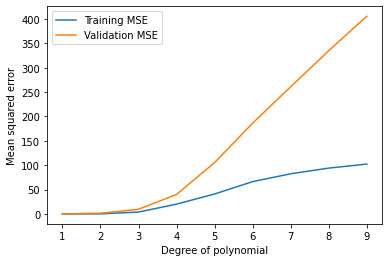

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the data using the create_train_test_set function
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

# Define the degrees of polynomial to test
degrees = np.arange(1, 10)

train_mse = []
val_mse = []

# Fit a polynomial regression model for each degree and compute the MSE on the train and validation sets
for degree in degrees:
    pipeline = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('lin_reg', LinearRegression())
    ])
    pipeline.fit(X_train, Y_train)
    Y_train_pred = pipeline.predict(X_train)
    Y_val_pred = pipeline.predict(X_val)
    train_mse.append(mean_squared_error(Y_train, Y_train_pred))
    val_mse.append(mean_squared_error(Y_val, Y_val_pred))

# Plot the mean squared error for each degree of polynomial
plt.plot(degrees, train_mse, label='Training MSE')
plt.plot(degrees, val_mse, label='Validation MSE')
plt.xlabel('Degree of polynomial')
plt.ylabel('Mean squared error')
plt.legend()
plt.show()
